# 第12回b 数理工学実験２

## データ解析2

### 14.3 タイタニック号の乗客データ

[映画タイタニック予告](https://www.youtube.com/watch?v=mGKne3YQgCY)

In [1]:
from IPython.display import Image
Image(url='http://graphics8.nytimes.com/images/section/learning/general/onthisday/big/0415_big.gif')

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams['font.family'] = "MS Gothic"

* CSVファイルの中身確認　（less: unix コマンド）

In [4]:
less train.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

* CSVファイルよりデータフレームへのデータ読み込み　（ファイル:[train.csv](http://kino.sub.jp/Prog2016/train.csv)）

In [5]:
df = pd.read_csv("./train.csv" , header = 0 )

* CSVファイルより読み込んだデータの確認

In [6]:
df
#df.head()
#df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* 乗客の名前リスト （例. 年齢，生存の有無）

In [7]:
df[["Name"]]
df[["Name"]].head(10)
df[["Name"]].tail(10)

,Name
881,"Markun, Mr. Johann"
882,"Dahlberg, Miss. Gerda Ulrika"
883,"Banfield, Mr. Frederick James"
884,"Sutehall, Mr. Henry Jr"
885,"Rice, Mrs. William (Margaret Norton)"
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"
890,"Dooley, Mr. Patrick"


In [8]:
df[["Name","Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [9]:
df[["Name","Age","Sex","Pclass","Survived"]]

,Name,Age,Sex,Pclass,Survived
0,"Braund, Mr. Owen Harris",22.0,male,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1
2,"Heikkinen, Miss. Laina",26.0,female,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1
4,"Allen, Mr. William Henry",35.0,male,3,0
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male,2,0
887,"Graham, Miss. Margaret Edith",19.0,female,1,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female,3,0
889,"Behr, Mr. Karl Howell",26.0,male,1,1


* 基本統計量の表示 （例. 年齢, チケット代）

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 乗客の年齢分布 

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

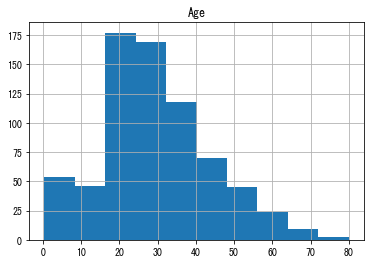

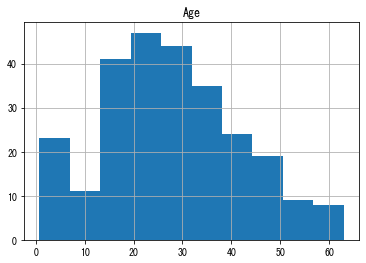

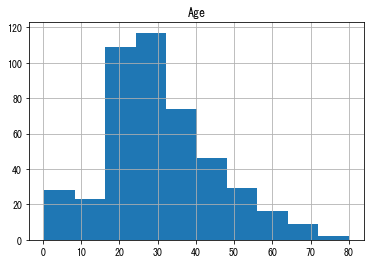

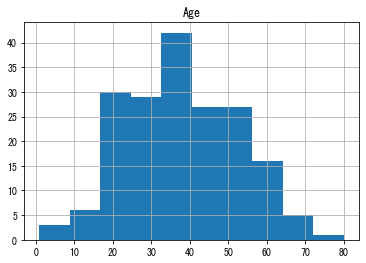

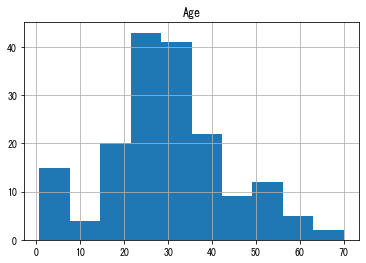

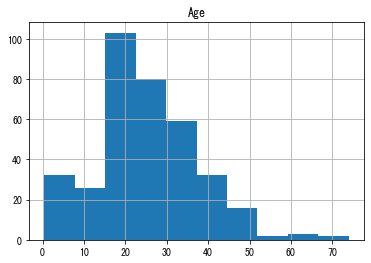

In [11]:
df.hist("Age")
df[df["Sex"]=="female"].hist("Age") 
df[df["Sex"]=="male"].hist("Age") 
df[df["Pclass"]==1].hist("Age") 
df[df["Pclass"]==2].hist("Age") 
df[df["Pclass"]==3].hist("Age") 

In [12]:
print( "平均年齢         = {:}".format( df["Age"].mean() ) )
print( "平均年齢(女性)　  = {:}".format( df[df["Sex"]=="female"]["Age"].mean() ) )
print( "平均年齢(男性)　  = {:}".format( df[df["Sex"]=="male"]["Age"].mean() ) )
print( "平均年齢(1等船室) = {:}".format( df[df["Pclass"]==1]["Age"].mean() ) )
print( "平均年齢(2等船室) = {:}".format( df[df["Pclass"]==2]["Age"].mean() ) )
print( "平均年齢(3等船室) = {:}".format( df[df["Pclass"]==3]["Age"].mean() ) )

平均年齢         = 29.69911764705882
平均年齢(女性)　  = 27.915708812260537
平均年齢(男性)　  = 30.72664459161148
平均年齢(1等船室) = 38.233440860215055
平均年齢(2等船室) = 29.87763005780347
平均年齢(3等船室) = 25.14061971830986


* チケット代の分布

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

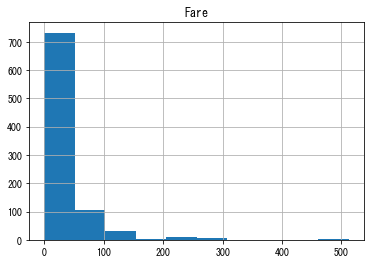

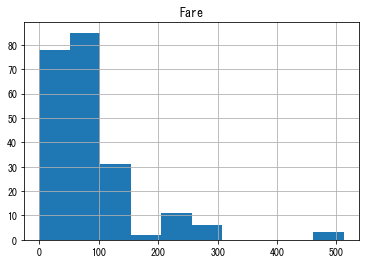

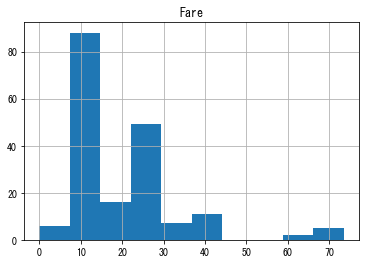

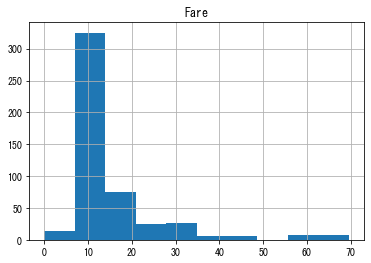

In [13]:
df.hist("Fare")
df[df["Pclass"]==1].hist("Fare")
df[df["Pclass"]==2].hist("Fare")
df[df["Pclass"]==3].hist("Fare")

In [14]:
df[(df["Pclass"]==1)&(df["Fare"]<10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


In [15]:
print( "平均チケット代         = {:}".format( df["Fare"].mean() ) )
print( "平均チケット代(1等船室) = {:}".format( df[df["Pclass"]==1]["Fare"].mean() ) )
print( "平均チケット代(2等船室) = {:}".format( df[df["Pclass"]==2]["Fare"].mean() ) )
print( "平均チケット代(3等船室) = {:}".format( df[df["Pclass"]==3]["Fare"].mean() ) )

平均チケット代         = 32.204207968574636
平均チケット代(1等船室) = 84.1546875
平均チケット代(2等船室) = 20.662183152173913
平均チケット代(3等船室) = 13.675550101832993


* 生存者数/死亡者数

In [16]:
print( "生存者数 = {:}".format( len( df[df["Survived"]==1].index ) ) )
print( "死亡者数 = {:}".format( len( df[df["Survived"]==0].index ) ) )

生存者数 = 342
死亡者数 = 549


Text(0, 0.5, 'Number')

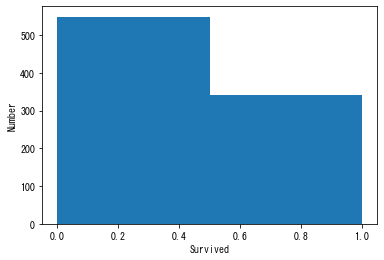

In [17]:
df["Survived"].plot(kind="hist",bins=2)
plt.xlabel("Survived")
plt.ylabel("Number")

* 男女別の生存者数/死亡者数

Text(0, 0.5, 'Number')

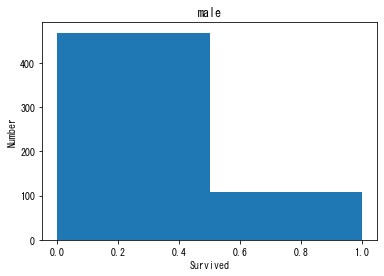

In [18]:
df["Survived"][df["Sex"]=="male"].plot(kind="hist",bins=2)
plt.title("male")
plt.xlabel("Survived")
plt.ylabel("Number")

Text(0, 0.5, 'Number')

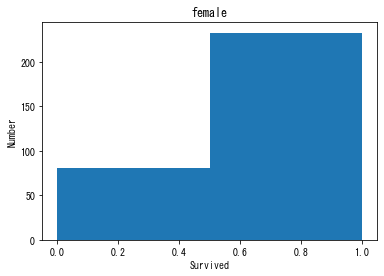

In [19]:
df["Survived"][df["Sex"]=="female"].plot(kind="hist",bins=2)
plt.title("female")
plt.xlabel("Survived")
plt.ylabel("Number")

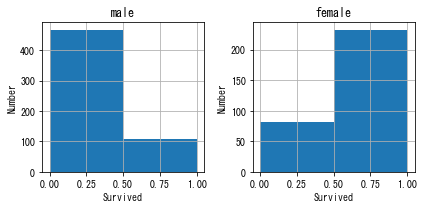

In [20]:
fig , axes = plt.subplots(nrows=1,ncols=2,figsize=(6,3))

i = 0
for sex in ["male","female"]:
    df["Survived"][df["Sex"]==sex].hist(bins=2,ax=axes[i])
    axes[i].set_title(sex)
    axes[i].set_xlabel("Survived")
    axes[i].set_ylabel("Number")
    
    i+=1
    
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

* 年齢別の生存者数/死亡者数

Text(0, 0.5, 'Number')

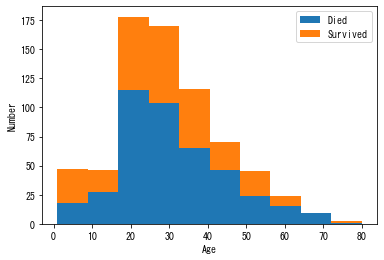

In [21]:
plt.hist( [ df[df["Survived"]==0]["Age"] , df[df["Survived"]==1]["Age"] ]
         , range = (1,80) , bins = 10 , stacked=True , label = ("Died","Survived"))

plt.legend()
plt.xlabel("Age")
plt.ylabel("Number")

Text(0.5, 1.0, 'female')

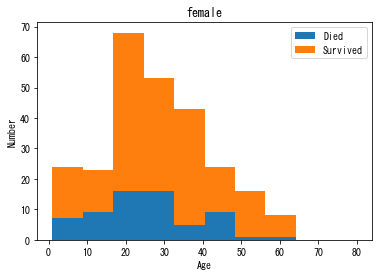

In [22]:
plt.hist( [df[(df["Survived"]==0)&(df["Sex"]=="female")]["Age"] , df[(df["Survived"]==1)&(df["Sex"]=="female")]["Age"] ]
         , range = (1,80) , bins = 10 , stacked=True , label = ("Died","Survived"))

plt.legend()
plt.xlabel("Age")
plt.ylabel("Number")
plt.title("female")

Text(0.5, 1.0, 'male')

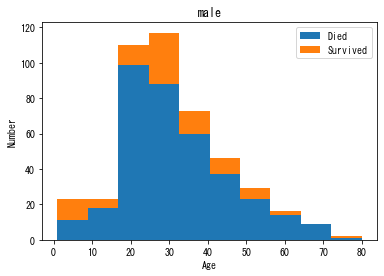

In [23]:
plt.hist( [df[(df["Survived"]==0)&(df["Sex"]=="male")]["Age"] , df[(df["Survived"]==1)&(df["Sex"]=="male")]["Age"] ]
         , range = (1,80) , bins = 10 , stacked=True , label = ("Died","Survived"))

plt.legend()
plt.xlabel("Age")
plt.ylabel("Number")
plt.title("male")

* 船室毎の生存者数/死亡者数

Text(0, 0.5, 'Number')

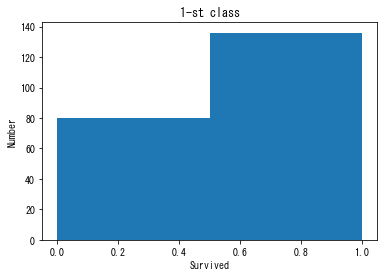

In [24]:
df["Survived"][df["Pclass"]==1].plot(kind="hist",bins=2)
plt.title("1-st class")
plt.xlabel("Survived")
plt.ylabel("Number")

Text(0, 0.5, 'Number')

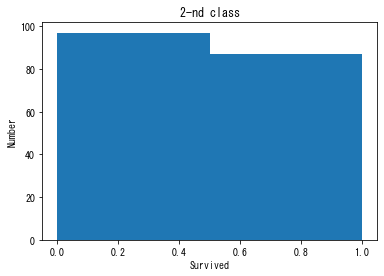

In [25]:
df["Survived"][df["Pclass"]==2].plot(kind="hist",bins=2)
plt.title("2-nd class")
plt.xlabel("Survived")
plt.ylabel("Number")

Text(0, 0.5, 'Number')

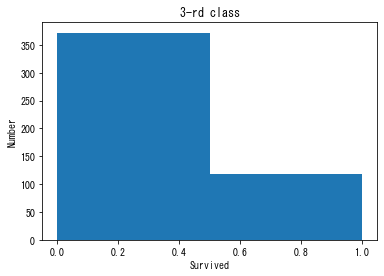

In [26]:
df["Survived"][df["Pclass"]==3].plot(kind="hist",bins=2)
plt.title("3-rd class")
plt.xlabel("Survived")
plt.ylabel("Number")

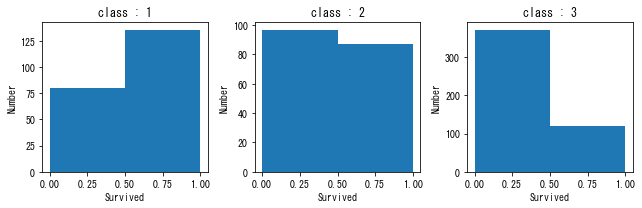

In [27]:
fig , axes = plt.subplots(nrows=1,ncols=3,figsize=(9,3))

i = 0
for pclass in [1,2,3]:
    df[df["Pclass"]==pclass]["Survived"].plot(kind='hist',bins=2,ax=axes[i])
    axes[i].set_title("class : " + str(pclass) )
    axes[i].set_xlabel("Survived")
    axes[i].set_ylabel("Number")
    
    i+=1
    
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()



## レポート課題

[Kaggle](https://www.kaggle.com/)から興味のあるデータを取得し，Pandasを用いてデータ解析を行いなさい．

今回はグラフの表示も見る必要があるので、**プログラムとデータファイルをともに送ること**。

他の人と異なるデータを用いデータ解析している場合に評価を高くします。

**データ解析のポイント**

- 異なる性質のデータ同士の関係から得られる知見を考えるようにする
- データ数が多い物はヒストグラムを見ると良い（むしろヒストグラムを見られるデータがよい）

**〆切：01/8（水）までにGoogle Classroomでjupyter notebook形式「id_学籍番号_12.ipynb」形式およびデータ（データ形式は様々だと思いますcsv, json, txtなどなど）を送ること**）  